In [1]:
%pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached matplotlib-3.6.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)
  Using cached kiwisolver-1.4.4-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-9.3.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.3 MB)
  Using cached contourpy-1.0.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (296 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the layout of our problem as follows
p: int = 30
n: int = 50
trials: int = 200

# Create the design matrix
X: np.ndarray = np.random.normal(size=(n, p))

# Create our beta
beta: np.ndarray = np.random.uniform(size=(p,))
beta[:10] = beta[:10] * 0.5 + 0.5
beta[10:] = beta[10:] * 0.3

# And calculate our error term eps
eps: np.ndarray = np.random.normal(size=(trials, n))

# And Y
Y: np.ndarray = X @ beta + eps
print(Y.shape)

(200, 50)


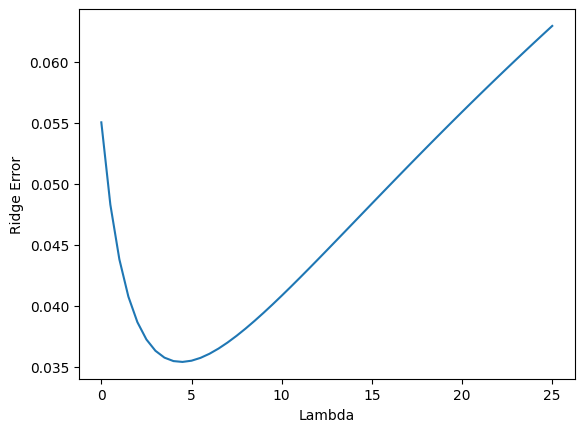

In [3]:
errors: list = []

for lam in (l / 2 for l in range(51)):
    beta_ridge = (X.T @ X + lam * np.eye(p))

    beta_ridge = np.linalg.pinv(beta_ridge) @ (X.T @ Y.T)
    ridge_error = np.mean((beta[..., None] - beta_ridge)**2)

    errors.append((lam, ridge_error))

errors = np.array(errors)
plt.plot(errors[:, 0], errors[:, 1])
plt.xlabel("Lambda")
plt.ylabel("Ridge Error")
plt.show()

Hier ist der OLS Schaetzer implizit bei $\lambda = 0$ zu sehen.